In [9]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

In [3]:
from openfermion import QubitOperator, MolecularData, taper_off_qubits, commutator
from openfermionpyscf import run_pyscf
from openfermion.transforms import get_fermion_operator, bravyi_kitaev, jordan_wigner

In [4]:
from openfermion import MolecularData

In [5]:
basis = 'sto-3g'

In [22]:
g = get_molecular_data('h2', 1, xyz_format=False)
print(g)

[['H', [0, 0, 0]], ['H', [0, 0, 1]]]


In [24]:
mol = MolecularData(g, basis, multiplicity=1, charge=0)
print(mol)

In [25]:
mol = run_pyscf(mol)
print(mol)

In [26]:
ham = mol.get_molecular_hamiltonian()
print(ham)

() 0.52917721092
((0, 1), (0, 0)) -1.1108441798837272
((1, 1), (1, 0)) -1.1108441798837272
((2, 1), (2, 0)) -0.5891210037060828
((3, 1), (3, 0)) -0.5891210037060828
((0, 1), (0, 1), (0, 0), (0, 0)) 0.31320124976475894
((0, 1), (0, 1), (2, 0), (2, 0)) 0.09839529174273512
((0, 1), (1, 1), (1, 0), (0, 0)) 0.31320124976475894
((0, 1), (1, 1), (3, 0), (2, 0)) 0.09839529174273512
((0, 1), (2, 1), (0, 0), (2, 0)) 0.09839529174273512
((0, 1), (2, 1), (2, 0), (0, 0)) 0.3108533815598566
((0, 1), (3, 1), (1, 0), (2, 0)) 0.09839529174273512
((0, 1), (3, 1), (3, 0), (0, 0)) 0.3108533815598566
((1, 1), (0, 1), (0, 0), (1, 0)) 0.31320124976475894
((1, 1), (0, 1), (2, 0), (3, 0)) 0.09839529174273512
((1, 1), (1, 1), (1, 0), (1, 0)) 0.31320124976475894
((1, 1), (1, 1), (3, 0), (3, 0)) 0.09839529174273512
((1, 1), (2, 1), (0, 0), (3, 0)) 0.09839529174273512
((1, 1), (2, 1), (2, 0), (1, 0)) 0.3108533815598566
((1, 1), (3, 1), (1, 0), (3, 0)) 0.09839529174273512
((1, 1), (3, 1), (3, 0), (1, 0)) 0.31085338

In [15]:
hamf = get_fermion_operator(ham)
print(hamf)

0.52917721092 [] +
-1.1108441798837272 [0^ 0] +
0.31320124976475894 [0^ 0^ 0 0] +
0.09839529174273512 [0^ 0^ 2 2] +
0.31320124976475894 [0^ 1^ 1 0] +
0.09839529174273512 [0^ 1^ 3 2] +
0.09839529174273512 [0^ 2^ 0 2] +
0.3108533815598566 [0^ 2^ 2 0] +
0.09839529174273512 [0^ 3^ 1 2] +
0.3108533815598566 [0^ 3^ 3 0] +
0.31320124976475894 [1^ 0^ 0 1] +
0.09839529174273512 [1^ 0^ 2 3] +
-1.1108441798837272 [1^ 1] +
0.31320124976475894 [1^ 1^ 1 1] +
0.09839529174273512 [1^ 1^ 3 3] +
0.09839529174273512 [1^ 2^ 0 3] +
0.3108533815598566 [1^ 2^ 2 1] +
0.09839529174273512 [1^ 3^ 1 3] +
0.3108533815598566 [1^ 3^ 3 1] +
0.31085338155985665 [2^ 0^ 0 2] +
0.09839529174273512 [2^ 0^ 2 0] +
0.31085338155985665 [2^ 1^ 1 2] +
0.09839529174273512 [2^ 1^ 3 0] +
-0.5891210037060828 [2^ 2] +
0.09839529174273512 [2^ 2^ 0 0] +
0.3265353734712869 [2^ 2^ 2 2] +
0.09839529174273512 [2^ 3^ 1 0] +
0.3265353734712869 [2^ 3^ 3 2] +
0.31085338155985665 [3^ 0^ 0 3] +
0.09839529174273512 [3^ 0^ 2 1] +
0.31085338155985

In [7]:
g = get_molecular_data(['h2o'], 1, xyz_format=False)
print(g)
mol = MolecularData(g, basis, multiplicity=1, charge=0)
print(mol)
mol = run_pyscf(mol)
print(mol)
ham = mol.get_molecular_hamiltonian()
print(ham)

[['O', [0, 0, 0]], ['H', [-0.8069603121438019, 0.5906056676199254, 0]], ['H', [0.8069603121438019, 0.5906056676199254, 0]]]
() 8.794718421108099
((0, 1), (0, 0)) -32.656245003533705
((0, 1), (2, 0)) 0.5615696859124234
((0, 1), (6, 0)) -0.22345211159108255
((0, 1), (10, 0)) 0.29399191752957177
((1, 1), (1, 0)) -32.656245003533705
((1, 1), (3, 0)) 0.5615696859124234
((1, 1), (7, 0)) -0.22345211159108255
((1, 1), (11, 0)) 0.29399191752957177
((2, 1), (0, 0)) 0.5615696859124255
((2, 1), (2, 0)) -7.626505773186155
((2, 1), (6, 0)) 0.46036196607949914
((2, 1), (10, 0)) -1.335181142077956
((3, 1), (1, 0)) 0.5615696859124255
((3, 1), (3, 0)) -7.626505773186155
((3, 1), (7, 0)) 0.46036196607949914
((3, 1), (11, 0)) -1.335181142077956
((4, 1), (4, 0)) -6.246153611310428
((4, 1), (12, 0)) -1.7375352008642422
((5, 1), (5, 0)) -6.246153611310428
((5, 1), (13, 0)) -1.7375352008642422
((6, 1), (0, 0)) -0.22345211159108297
((6, 1), (2, 0)) 0.4603619660794992
((6, 1), (6, 0)) -6.892498877456442
((6, 1)

In [11]:
bond_lengths = np.linspace(0.5,2.7,15)

In [12]:
FCI_PES = obtain_PES(['h2o'], bond_lengths, basis, method='fci')

Could not converge


In [13]:
FCI_PES

array([-73.14278406, -74.47523205, -74.90413378, -75.01383134,
       -75.00356512, -74.95170869, -74.89218648, -74.83923064,
       -74.79866366, -74.77161515, -74.75568947, -74.74704715,
       -74.74248899, -74.74007427,          nan])

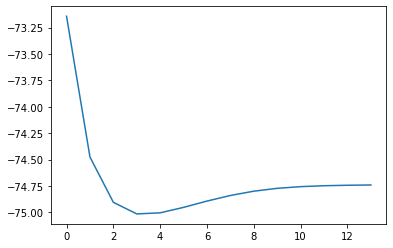

In [14]:
plt.plot(FCI_PES)

In [17]:
CCSD_PES = obtain_PES(['h2o'], bond_lengths, basis,  method='ccsd')

Could not converge


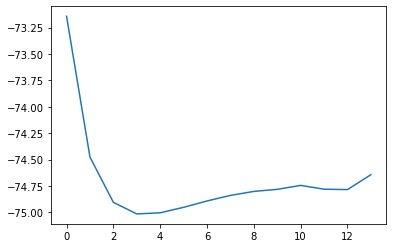

In [18]:
plt.plot(CCSD_PES)

In [1]:
def get_molecular_data(mol, geometry, xyz_format=False):
    '''
    Generate the molecular data of the specified molecule
    '''
    if mol == 'h2':
        mol_data = [
            ['H', [0, 0, 0]],
            ['H', [0, 0, geometry]]
        ]
        
    elif mol== 'h2farh2':
        mol_data = [
            ['H', [0, 0, 0]],
            ['H', [0, 0, geometry]],
            ['H', [0, 0, 100 + geometry]],
            ['H', [0, 0, 100 + 2*geometry]]
        ]
        
    elif mol == 'lih':
        mol_data = [
            ['Li', [0, 0, 0]],
            ['H', [0, 0, geometry]]
        ]
    elif mol == 'h2o':
        # Giving symmetrically stretch H2O. ∠HOH = 107.6°
        # Geometry is distance between H-O
        angle = 107.6 / 2
        angle = math.radians(angle)
        x = geometry * math.sin(angle)
        y = geometry * math.cos(angle)
        mol_data = [
            ['O', [0, 0, 0]],
            ['H', [-x, y, 0]],
            ['H', [x, y, 0]]
        ]
    elif mol == 'n2':
        mol_data = [
            ['N', [0, 0, 0]],
            ['N', [0, 0, geometry]]
        ]
    elif mol == 'h4':
        mol_data = [
            ['H', [0, 0, 0]],
            ['H', [0, 0, geometry]],
            ['H', [0, geometry, 0]],
            ['H', [0, geometry, geometry]]
        ]
    elif mol == 'nh3':
        bondAngle = 107
        bondAngle = math.radians(bondAngle)
        cos = math.cos(bondAngle)
        sin = math.sin(bondAngle)

        # The idea is second and third vecctor dot product is cos(angle) * geometry^2.
        thirdyRatio = (cos - cos**2) / sin
        thirdxRatio = (1 - cos**2 - thirdyRatio**2) ** (1/2)
        mol_data = [
            ['H', [0.0, 0.0, geometry]],
            ['H', [0.0, sin * geometry, cos * geometry]],
            ['H', [thirdxRatio * geometry, thirdyRatio * geometry, cos * geometry]],
            ['N', [0.0, 0.0, 0.0]]
            ]

    else:
        raise(ValueError(mol, 'Unknown molecules given'))

    if xyz_format:
        return convert_mol_data_to_xyz_format(mol_data)
    else:
        return mol_data


In [4]:
g = get_molecular_data('h2farh2', 1)
print(g)

[['H', [0, 0, 0]], ['H', [0, 0, 1]], ['H', [0, 0, 101]], ['H', [0, 0, 102]]]


In [28]:
geometry = 1
mol_data = [
            ['H', [0, 0, 0]],
            ['H', [0, 0, geometry]],
            ['H', [0, 0, + 100 + geometry]],
            ['H', [0, 0, + 100 + 2*geometry]]
        ]

In [11]:
mol_data

[['H', [0, 0, 0]], ['H', [0, 0, 1]], ['H', [0, 0, 101]], ['H', [0, 0, 102]]]

In [9]:
mol = MolecularData(g, basis, multiplicity=1, charge=0)

In [10]:
molf = run_pyscf(mol)

NameError: name 'run_pyscf' is not defined

In [17]:
ham = mol.get_molecular_hamiltonian()
hamf = get_fermion_operator(ham)